# UNDP Intern Data Test - Sayeed Ahmed

In [52]:
import folium
import pandas as pd
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.stats import chi2_contingency
import re
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer


In [53]:
# Loding datasets
acled_nigeria_data = pd.read_csv("Nigeria ACLED Export.csv")
news_emm_nigeria = pd.read_csv("Nigeria News EMM Export.csv")

## Performing Exploratory Data Analysis before proceeding to the task.

In [54]:
print("Political Violence Data:")
display(acled_nigeria_data.head())

print("Political Violence Data Shape:")
display(acled_nigeria_data.shape)

print("Missing Values in Political Violence Data:")
display(acled_nigeria_data.isnull().sum())

print("Basic Statistics of Political Violence Data:")
display(acled_nigeria_data.describe())

Political Violence Data:


,ACLED Actor1,ACLED Actor1 (group),ACLED Actor2,ACLED Admin1,ACLED Admin2,ACLED Admin3,ACLED Ally Actor1,ACLED Ally Actor2,ACLED CreatedOn,ACLED Event ID Cnty,ACLED Event ID No Cnty,ACLED Event SubType,ACLED Event SubTypeDesc,ACLED Event Type,ACLED Event TypeDesc,ACLED Location,ACLED Notes,ACLED Region,ACLED Source,ACLED SourceScale,ACLED Year,Geographic Area,ACLED Fatalities,ACLED Geo Precision,ACLED Geometrry,Acled Gwno,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude,Acled Pk,TimeFK Event Date
0,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Abia,Umuahia North,NaN,NaN,NaN,12/12/2022 3:33,NIG28349,28349,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Umuahia,"On 15 October 2022, a policeman shot and kille...",Western Africa,Premium Times (Nigeria),National,2022,South,1,1,Point,NaN,1,1,11,5.5263,7.4896,4083963,20221015
1,Military Forces of Nigeria (2015-),State Security Forces,Military Forces of Nigeria (2015-),Imo,Oguta,NaN,NaN,NaN,12/6/2022 15:53,NIG28909,28909,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Izombe,"On 28 November 2022, suspected security operat...",Western Africa,Daily Trust (Nigeria),National,2022,South,0,1,Point,NaN,1,1,11,5.6333,6.8666,4068208,20221128
2,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Lagos,Amowo-Odofin,NaN,NaN,NaN,12/13/2022 9:05,NIG29012,29012,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Satellite Town,"On 3 December 2022, some naval officers clashe...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2022,South,1,1,Point,NaN,1,1,11,6.4437,3.2522,4091266,20221203
3,Military Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Ogun,Shagamu,NaN,NaN,NaN,2/21/2023 9:05,NIG29996,29996,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Ogigo,"On 15 February 2023, soldiers from 174 battali...",Western Africa,Daily Trust (Nigeria); Nigeria Punch,National,2023,South,0,1,Point,NaN,1,1,11,6.6955,3.5117,4169404,20230215
4,Police Forces of Nigeria (2015-),State Security Forces,Police Forces of Nigeria (2015-),Kebbi,Birnin-Kebbi,NaN,NaN,NaN,12/12/2022 3:33,NIG28350,28350,Armed clash,"Armed, organized groups engage in a battle, an...",Battles,A violent interaction between two politically ...,Birnin Kebbi,"On 1 October 2022, a policeman stabbed and kil...",Western Africa,Sahara Reporters; Daily Trust (Nigeria),National-Regional,2022,North West,1,1,Point,NaN,1,1,11,12.4539,4.1975,4080329,20221001


Political Violence Data Shape:


(1902, 33)

Missing Values in Political Violence Data:


ACLED Actor1                  0
ACLED Actor1 (group)          0
ACLED Actor2                301
ACLED Admin1                  0
ACLED Admin2                  0
ACLED Admin3               1902
ACLED Ally Actor1          1472
ACLED Ally Actor2          1262
ACLED CreatedOn               0
ACLED Event ID Cnty           0
ACLED Event ID No Cnty        0
ACLED Event SubType           0
ACLED Event SubTypeDesc       0
ACLED Event Type              0
ACLED Event TypeDesc          0
ACLED Location                0
ACLED Notes                   0
ACLED Region                  0
ACLED Source                  0
ACLED SourceScale             0
ACLED Year                    0
Geographic Area               0
ACLED Fatalities              0
ACLED Geo Precision           0
ACLED Geometrry               0
Acled Gwno                 1772
ACLED Inter1                  0
ACLED Inter2                  0
ACLED Interaction             0
ACLED Latitude                0
ACLED Longitude               0
Acled Pk

Basic Statistics of Political Violence Data:


,ACLED Admin3,ACLED Event ID No Cnty,ACLED Year,ACLED Fatalities,ACLED Geo Precision,Acled Gwno,ACLED Inter1,ACLED Inter2,ACLED Interaction,ACLED Latitude,ACLED Longitude,Acled Pk,TimeFK Event Date
count,0.0,1902.000000,1902.000000,1902.000000,1902.000000,130.0,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1.902000e+03,1.902000e+03
mean,NaN,29050.584648,2022.356467,1.976866,1.398002,0.0,3.416404,4.326498,35.817035,8.928142,7.577692,4.102586e+06,2.022434e+07
std,NaN,815.280355,0.479081,6.945303,0.494957,0.0,1.555599,2.894265,16.570293,2.656412,2.624220,4.157924e+04,4.328883e+03
min,NaN,26494.000000,2022.000000,0.000000,1.000000,0.0,1.000000,0.000000,10.000000,4.511400,2.850000,4.033565e+06,2.022100e+07
25%,NaN,28674.250000,2022.000000,0.000000,1.000000,0.0,3.000000,1.000000,16.000000,6.450775,6.207925,4.067888e+06,2.022111e+07
50%,NaN,29157.500000,2022.000000,0.000000,1.000000,0.0,3.000000,5.000000,37.000000,8.875800,7.195800,4.097680e+06,2.022121e+07
75%,NaN,29638.750000,2023.000000,1.000000,2.000000,0.0,4.000000,7.000000,47.000000,11.486750,8.208700,4.139442e+06,2.023012e+07
max,NaN,30117.000000,2023.000000,150.000000,3.000000,0.0,8.000000,8.000000,70.000000,13.729000,14.251100,4.178742e+06,2.023022e+07


In [55]:
print("News Data:")
display(news_emm_nigeria.head())

print("News Data Shape:")
display(news_emm_nigeria.shape)

print("Missing Values in News Data:")
display(news_emm_nigeria.isnull().sum())

print("Basic Statistics of News Data:")
display(news_emm_nigeria.describe())

News Data:


,Newsfeed Country,Newsfeed Country UNDPRegion,Newsfeed CountryISO,Newsfeed DateDisplay,Newsfeed Description,Newsfeed Description2,Newsfeed Entity,Newsfeed IncidentType,Newsfeed Language,Newsfeed Link,Newsfeed Source,Newsfeed Source Description,Newsfeed Source Url,Newsfeed Source2,Newsfeed Trajectory,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK
0,Nigeria,Africa,NGA,12/3/2022 8:54,Imo Police operatives repel attack on Orlu INE...,NaN,"Electoral Commission,Eastern Security Network,...",UNDP_Security,English,https://247ureports.com/2022/12/imo-police-ope...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,247ureports,NaN,20221203,5.79565,7.03513,908
1,Nigeria,Africa,NGA,12/3/2022 8:54,Defence Headquarters accuses Reuters of blackmail,NaN,"Maj.-Gen,Chibok School,Borno Government,Boko H...",UNDP_Security,English,https://247ureports.com/2022/12/defence-headqu...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,247ureports,NaN,20221203,9.05785,7.49508,909
2,Nigeria,Africa,NGA,12/3/2022 15:42,NRC To Resume Abuja-Kaduna Rail Operations On ...,NaN,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_Conflict,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,NaN,20221203,10.52641,7.43879,910
3,Nigeria,Africa,NGA,12/3/2022 15:42,NRC To Resume Abuja-Kaduna Rail Operations On ...,NaN,"Fidet Okhiria,Boko Haram,Railway Corporation",UNDP_TerroristAttack,English,https://www.africanexaminer.com/nrc-to-resume-...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,africanexaminer,NaN,20221203,10.52641,7.43879,911
4,Nigeria,Africa,NGA,12/3/2022 17:02,Which diet is best for me? DailyMail.com weigh...,NaN,"University of Illinois, Chicago,Hannah Holsche...",UNDP_ScienceandTechnology,English,https://www.businesstelegraph.co.uk/which-diet...,EMM,The freely accessible Europe Media Monitor (EM...,http://emm.newsbrief.eu/NewsBrief,businesstelegraph,NaN,20221203,45.41117,-75.69812,912


News Data Shape:


(1576, 19)

Missing Values in News Data:


Newsfeed Country                  0
Newsfeed Country UNDPRegion       0
Newsfeed CountryISO               0
Newsfeed DateDisplay              0
Newsfeed Description              0
Newsfeed Description2          1576
Newsfeed Entity                  71
Newsfeed IncidentType             0
Newsfeed Language                 0
Newsfeed Link                     0
Newsfeed Source                   0
Newsfeed Source Description       0
Newsfeed Source Url               0
Newsfeed Source2                  0
Newsfeed Trajectory            1576
Date FK                           0
Newsfeed Latitude                50
Newsfeed Longitude               50
Newsfeed PK                       0
dtype: int64

Basic Statistics of News Data:


,Newsfeed Description2,Newsfeed Trajectory,Date FK,Newsfeed Latitude,Newsfeed Longitude,Newsfeed PK
count,0.0,0.0,1.576000e+03,1526.000000,1526.000000,1576.000000
mean,NaN,NaN,2.022727e+07,14.700158,10.733433,57165.862944
std,NaN,NaN,4.186104e+03,16.514939,36.556248,34065.332909
min,NaN,NaN,2.022120e+07,-51.693820,-169.678510,908.000000
25%,NaN,NaN,2.022122e+07,6.496460,4.669940,26555.750000
50%,NaN,NaN,2.023012e+07,9.057850,7.495080,57444.500000
75%,NaN,NaN,2.023021e+07,13.389720,11.167290,84370.250000
max,NaN,NaN,2.023030e+07,65.736410,177.674070,119587.000000


In [56]:
def separate_columns(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    continuous_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

    return categorical_cols, continuous_cols

# Separate categorical and continuous columns for Political Violence Data
categorical_cols_pv, continuous_cols_pv = separate_columns(acled_nigeria_data)

# Separate categorical and continuous columns for News Data
categorical_cols_news, continuous_cols_news = separate_columns(news_emm_nigeria)

print("Categorical columns for Political Violence Data:")
display(categorical_cols_pv)

print("\nContinuous columns for Political Violence Data:")
display(continuous_cols_pv)

print("\nCategorical columns for News Data:")
display(categorical_cols_news)

print("\nContinuous columns for News Data:")
display(continuous_cols_news)

Categorical columns for Political Violence Data:


['ACLED Actor1',
 'ACLED Actor1 (group)',
 'ACLED Actor2',
 'ACLED Admin1',
 'ACLED Admin2',
 'ACLED Ally Actor1',
 'ACLED Ally Actor2',
 'ACLED CreatedOn',
 'ACLED Event ID Cnty',
 'ACLED Event SubType',
 'ACLED Event SubTypeDesc',
 'ACLED Event Type',
 'ACLED Event TypeDesc',
 'ACLED Location',
 'ACLED Notes',
 'ACLED Region',
 'ACLED Source',
 'ACLED SourceScale',
 'Geographic Area',
 'ACLED Geometrry']


Continuous columns for Political Violence Data:


['ACLED Admin3',
 'ACLED Event ID No Cnty',
 'ACLED Year',
 'ACLED Fatalities',
 'ACLED Geo Precision',
 'Acled Gwno',
 'ACLED Inter1',
 'ACLED Inter2',
 'ACLED Interaction',
 'ACLED Latitude',
 'ACLED Longitude',
 'Acled Pk',
 'TimeFK Event Date']


Categorical columns for News Data:


['Newsfeed Country',
 'Newsfeed Country UNDPRegion',
 'Newsfeed CountryISO',
 'Newsfeed DateDisplay',
 'Newsfeed Description',
 'Newsfeed Entity',
 'Newsfeed IncidentType',
 'Newsfeed Language',
 'Newsfeed Link',
 'Newsfeed Source',
 'Newsfeed Source Description',
 'Newsfeed Source Url',
 'Newsfeed Source2']


Continuous columns for News Data:


['Newsfeed Description2',
 'Newsfeed Trajectory',
 'Date FK',
 'Newsfeed Latitude',
 'Newsfeed Longitude',
 'Newsfeed PK']

## 1. What is the violence profile in Nigeria in the given time period?

### 1a: What are the most common Event Types of political violence?

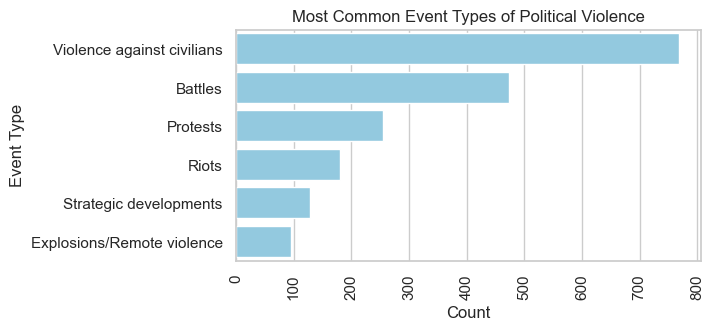

In [74]:
event_types = acled_nigeria_data['ACLED Event Type'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=event_types.values, y=event_types.index, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.title('Most Common Event Types of Political Violence')
plt.xticks(rotation=90)
plt.show()

### 1b: Which actors are the highest risk actors? (Fatality vs Number of Events)

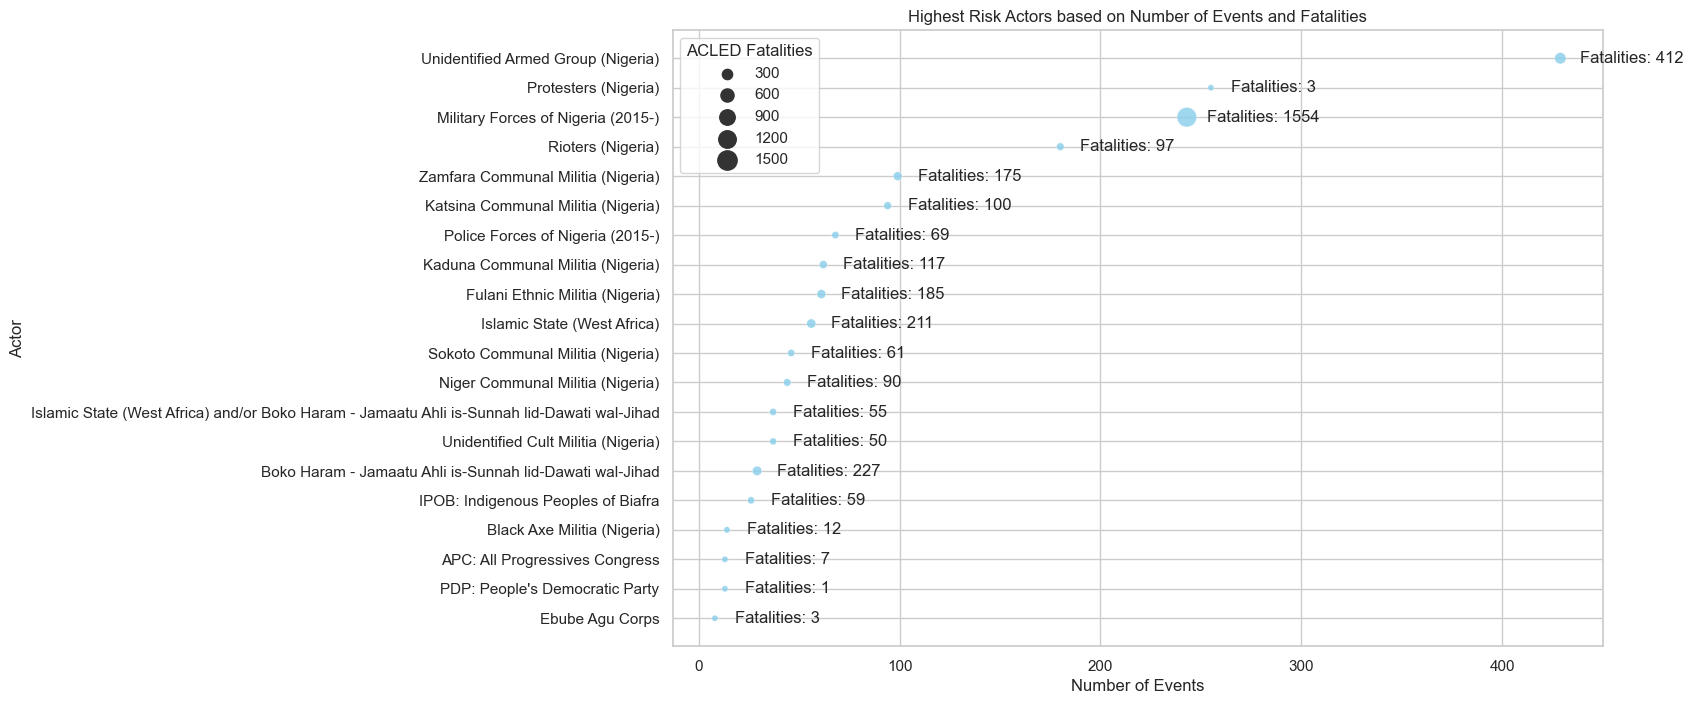

In [58]:
actor_counts = acled_nigeria_data['ACLED Actor1'].value_counts()
actor_fatalities = acled_nigeria_data.groupby('ACLED Actor1')['ACLED Fatalities'].sum()
top_actors = actor_counts.index[:20]  # Select top 20 actors

plt.figure(figsize=(12, 8))
sns.scatterplot(x=actor_counts[top_actors], y=top_actors, size=actor_fatalities[top_actors],
                sizes=(20, 200), alpha=0.8, color='skyblue')
plt.xlabel('Number of Events')
plt.ylabel('Actor')
plt.title('Highest Risk Actors based on Number of Events and Fatalities')

# Add labels for each data point
for i, actor in enumerate(top_actors):
    plt.text(actor_counts[actor] + 10, actor, f'Fatalities: {actor_fatalities[actor]}',
             verticalalignment='center')

plt.show()

### 1c: What is the geographic profile of the political violence?

In [75]:
# Create a base map centered on Nigeria using OpenStreetMap layout
map_nigeria = folium.Map(location=[9.081999, 8.675277], zoom_start=6, tiles='OpenStreetMap')

# Create a list of event locations
event_locations = acled_nigeria_data[['ACLED Latitude', 'ACLED Longitude']].values.tolist()

# Add the heatmap overlay
HeatMap(event_locations).add_to(map_nigeria)

# Display the map
map_nigeria


### 1d: What features of this data set have the most associative or predictive value?

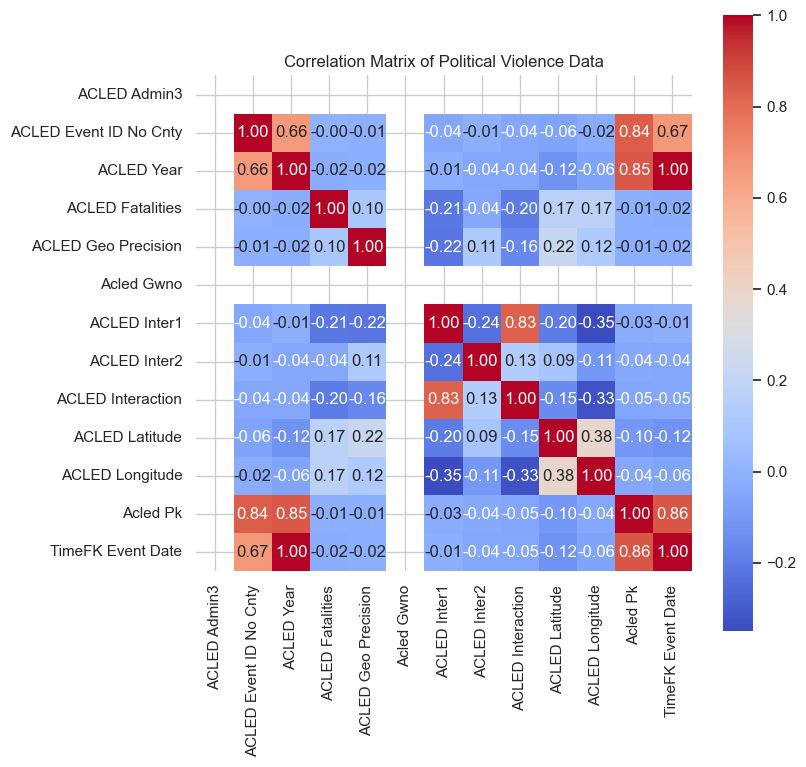

In [60]:
corr_matrix_pv = acled_nigeria_data[continuous_cols_pv].corr()

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix_pv, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Political Violence Data')
plt.show()

## 2. What are the key news trends during the period attached?

### 2a: What are the key trending themes?

In [62]:
# Define stop words list
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.extend(['niger', 'nigeria', 'nigerian'])

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=custom_stop_words)
data_vectorized = vectorizer.fit_transform(news_emm_nigeria['Newsfeed Description'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(data_vectorized)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Print the topics found by the LDA model
for index, topic in enumerate(lda_model.components_):
    print(f'Top 10 words for Topic #{index}')
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print('\n')


Top 10 words for Topic #0
['alleged', 'buhari', 'east', 'ipob', 'insecurity', 'change', 'report', 'nasarawa', 'president', 'climate']


Top 10 words for Topic #1
['bandits', 'anambra', 'killed', 'zamfara', 'military', 'attack', 'police', 'gunmen', 'terrorists', 'kill']


Top 10 words for Topic #2
['human', 'africa', 'apc', 'killing', 'south', 'boko', 'haram', 'pdp', '2023', 'killed']


Top 10 words for Topic #3
['crash', 'dead', 'die', 'attack', 'police', 'clash', 'state', 'lagos', 'security', 'killed']


Top 10 words for Topic #4
['katsina', 'kanu', 'imo', '2023', 'state', 'elections', 'attack', 'ago', 'naira', 'buhari']




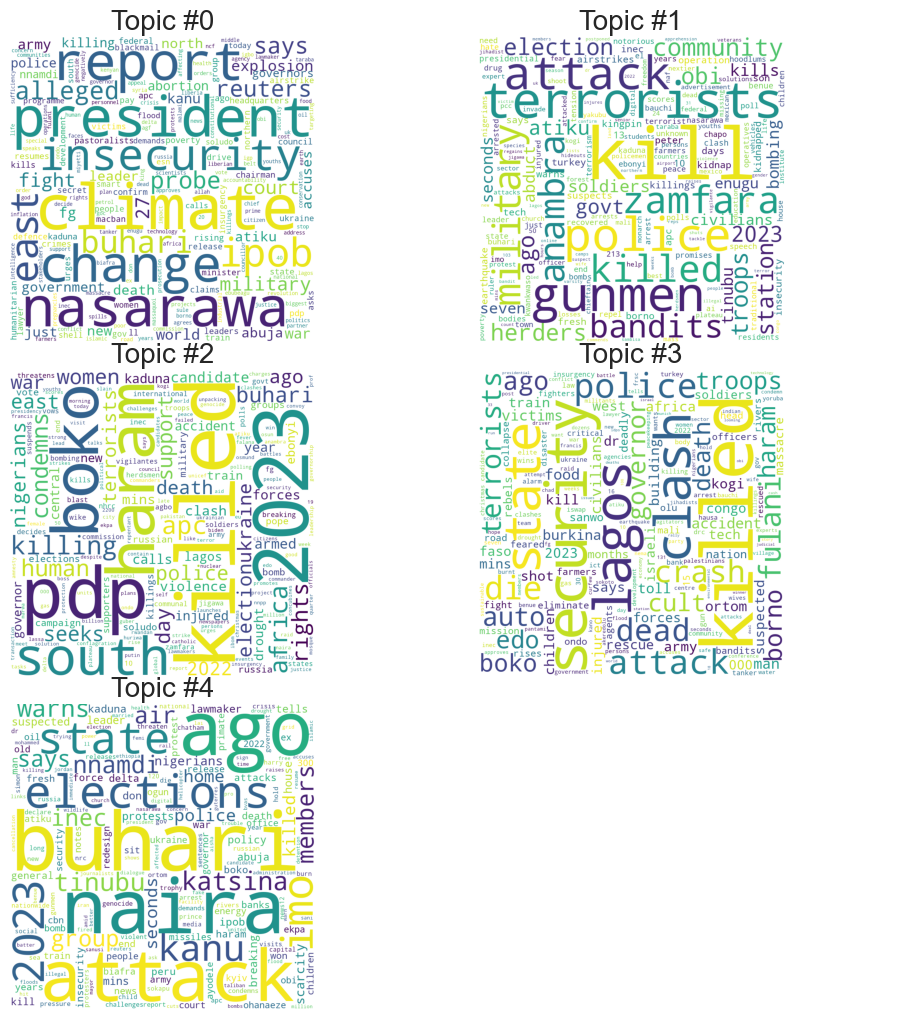

In [63]:
# Determine the number of topics
num_topics = len(lda_model.components_)

# Calculate the number of rows and columns we need for our grid
num_cols = 2
num_rows = np.ceil(num_topics / num_cols).astype(int)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10), facecolor=None)

for index, (ax, topic) in enumerate(zip(axs.flatten(), lda_model.components_)):
    topic_dict = {feature_names[i]: weight for i, weight in enumerate(topic)}

    wordcloud = WordCloud(background_color='white',
                          width=800,
                          height=800,
                          random_state=0).generate_from_frequencies(topic_dict)
    ax.imshow(wordcloud)
    ax.axis("off")

    ax.set_title(f'Topic #{index}', fontsize=20)

# Hide any unused subplots (in case of a grid incomplete)
for ax in axs.flatten()[num_topics:]:
    ax.axis("off")

plt.tight_layout(pad=0)
plt.show()


### 2b: Is there a key sentiment in the news?

In [64]:
nltk.download('vader_lexicon')

# Initialize the SIA
sia = SentimentIntensityAnalyzer()

# Applying the SIA to 'Newsfeed Description' column to get sentiment scores
news_emm_nigeria['sentiment_scores'] = news_emm_nigeria['Newsfeed Description'].apply(lambda text: sia.polarity_scores(text))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sayeedahmed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


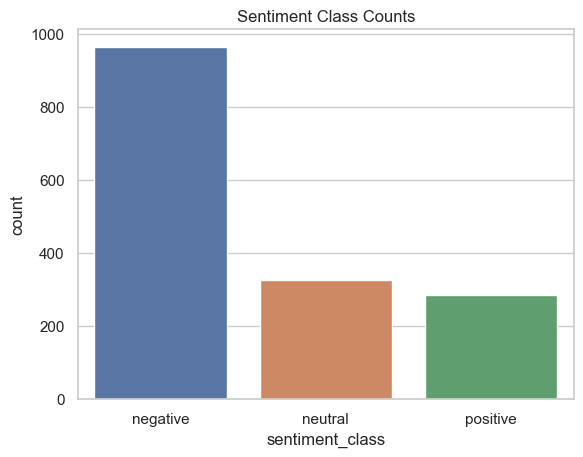

In [65]:
# Classify sentiments into positive, neutral and negative based on compound score
news_emm_nigeria['sentiment_class'] = news_emm_nigeria['sentiment_scores'].apply(lambda score_dict: 'positive' if score_dict['compound'] > 0 else ('neutral' if score_dict['compound'] == 0 else 'negative'))

sns.countplot(x='sentiment_class', data=news_emm_nigeria)
plt.title('Sentiment Class Counts')
plt.show()

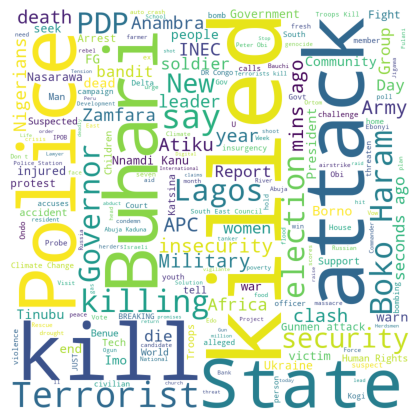

In [66]:
all_news_content = ' '.join(news_emm_nigeria['Newsfeed Description'])

# Define stop words list
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.extend(['niger', 'nigeria', 'nigerian', 'S'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=custom_stop_words).generate(all_news_content)

# Plot the wordcloud
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



## 3. Is there a correlation between political violence event types and the key news trending in the region?

In [76]:
# Extracting relevant columns
political_event_types = acled_nigeria_data['ACLED Event Type']
news_descriptions = news_emm_nigeria['Newsfeed Description']

# Performing topic modeling on the news dataset
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
news_vectorized = vectorizer.fit_transform(news_descriptions)

lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
news_topics = lda_model.fit_transform(news_vectorized)

num_samples = min(len(political_event_types), len(news_topics))
political_event_types = political_event_types[:num_samples]
news_topics = news_topics[:num_samples]

# Calculating the frequency of event type and topic combination
event_type_topics = pd.DataFrame({
    'Event Type': political_event_types,
    'Topic': news_topics.argmax(axis=1)
})

event_type_topic_counts = event_type_topics.groupby(['Event Type', 'Topic']).size().reset_index(name='Count')

# Analyzing correlation between event types and topics
contingency_table = pd.pivot_table(event_type_topic_counts, values='Count', index='Event Type', columns='Topic', fill_value=0)

chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-square statistic: 30.76282584840366
P-value: 0.0584004182096128


Topic #1: nigerians, insecurity, buhari, ago, atiku
Topic #2: killed, clash, ago, nasarawa, nlng
Topic #3: nigerians, worker, naira, boko, haram
Topic #4: kill, policy, attack, thoughts, killed
Topic #5: 2023, haram, boko, stations, climate


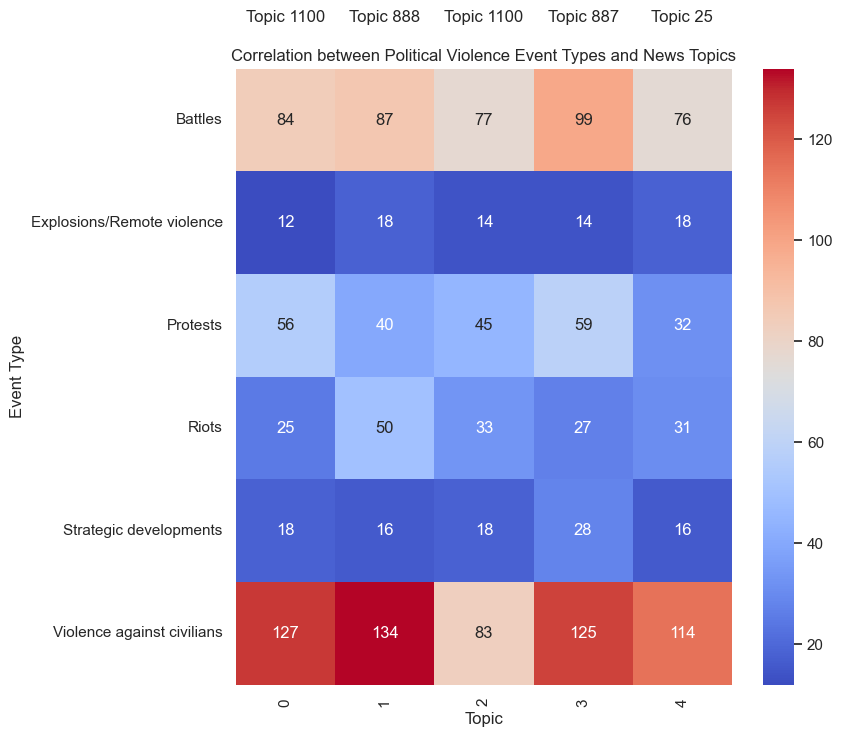

In [81]:
# Plotting the contingency table as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Correlation between Political Violence Event Types and News Topics')
plt.xlabel('Topic')
plt.ylabel('Event Type')

for i, topic_label in enumerate(lda_model.components_.argsort()[:, -1]):
    plt.text(i + 0.5, -0.5, f"Topic {topic_label + 1}", ha='center', va='center')

num_words = 5
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-(num_words+1):-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## 4. Additional Analysis

### Time Series Analysis of Political Violence and News Sentiment

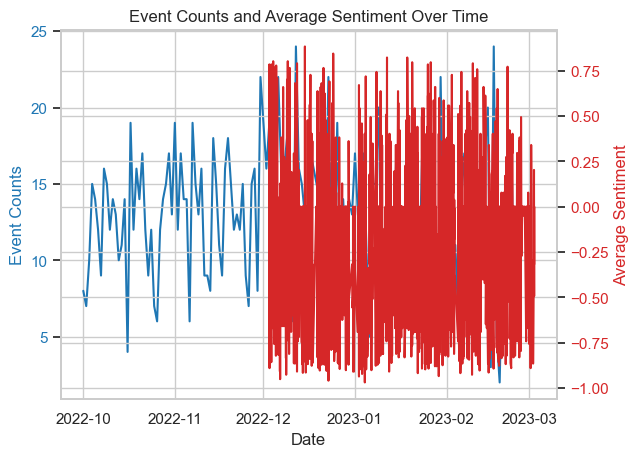

In [69]:
sia = SentimentIntensityAnalyzer()

def extract_date(note):
    match = re.search(r'(\d{1,2} \w{3,9} \d{4})', note)
    if match is not None:
        date_str = match.group(1)
        return pd.to_datetime(date_str, format='%d %B %Y', errors='coerce')
    else:
        return pd.NaT

# Computing sentiment scores
news_emm_nigeria['sentiment_scores'] = news_emm_nigeria['Newsfeed Description'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Extracting dates from the 'ACLED Notes' column
acled_nigeria_data['event_date'] = acled_nigeria_data['ACLED Notes'].apply(extract_date)
news_emm_nigeria['event_date'] = pd.to_datetime(news_emm_nigeria['Newsfeed DateDisplay'], format="%m/%d/%Y %H:%M")

# Counting the number of events per day
event_counts = acled_nigeria_data['event_date'].value_counts().sort_index()

# Calculating the average sentiment per day
average_sentiment = news_emm_nigeria.groupby('event_date')['sentiment_scores'].mean()

# Plot event counts and average sentiment over time
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Event Counts', color=color)
ax1.plot(event_counts.index, event_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sentiment', color=color)
ax2.plot(average_sentiment.index, average_sentiment.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Event Counts and Average Sentiment Over Time')
plt.show()


### Calculating 7-day rolling averages

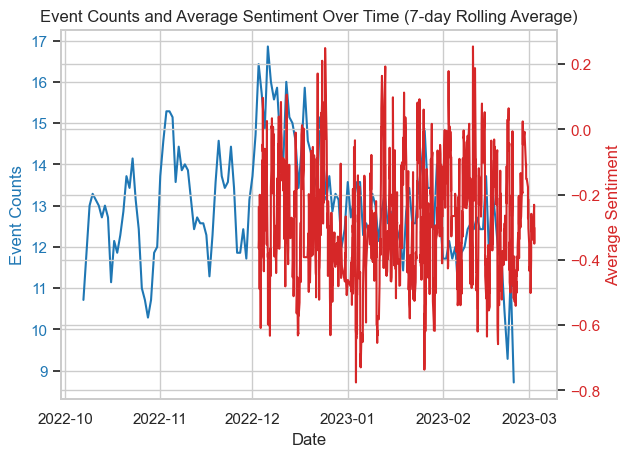

In [70]:
average_sentiment_smooth = average_sentiment.rolling(window=7).mean()
event_counts_smooth = event_counts.rolling(window=7).mean()

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Event Counts', color=color)
ax1.plot(event_counts_smooth.index, event_counts_smooth.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sentiment', color=color)
ax2.plot(average_sentiment_smooth.index, average_sentiment_smooth.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Event Counts and Average Sentiment Over Time (7-day Rolling Average)')
plt.show()


### Calculating 30-day rolling averages

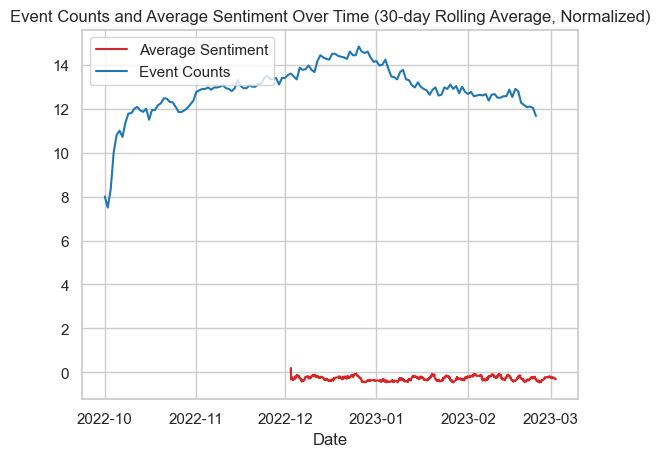

In [71]:
average_sentiment_smooth = average_sentiment.rolling(window=30).mean()
event_counts_smooth = event_counts.rolling(window=30).mean()

# Normalize data for better comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

average_sentiment_smooth = average_sentiment.rolling(window=30, min_periods=1).mean()
event_counts_smooth = event_counts.rolling(window=30, min_periods=1).mean()

fig, ax = plt.subplots()

ax.plot(average_sentiment_smooth.index, average_sentiment_smooth, label='Average Sentiment', color='tab:red')
ax.plot(event_counts_smooth.index, event_counts_smooth, label='Event Counts', color='tab:blue')

ax.set_xlabel('Date')
ax.set_title('Event Counts and Average Sentiment Over Time (30-day Rolling Average, Normalized)')

plt.legend(loc='upper left')
plt.show()
